<a href="https://colab.research.google.com/github/BaderAbdul/Data-Science-Bootcamp-project/blob/main/DA_bootcamp_MallCstmrs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining & Analysis Project**

## 1. Introduction
Goal: Exploring the data, cleaning it, extracting insights.  
Tools: Python (Pandas, Numpy, Matplotlib, Seaborn, Sklearn)


## 2. Data Upload and Overview
- Load dataset
- Inspect data
- Check for missing values

In [ ]:
#!pip install seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### File Uploading

In [ ]:
mc = pd.read_csv('/content/Mall_Customers2.csv')
mc.head()
mc.info()
mc.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     199 non-null    float64
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,199.000000,200.000000,200.000000
mean,100.500000,38.944724,60.560000,50.200000
std,57.879185,13.939696,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


###### Check for missing values

<Axes: >

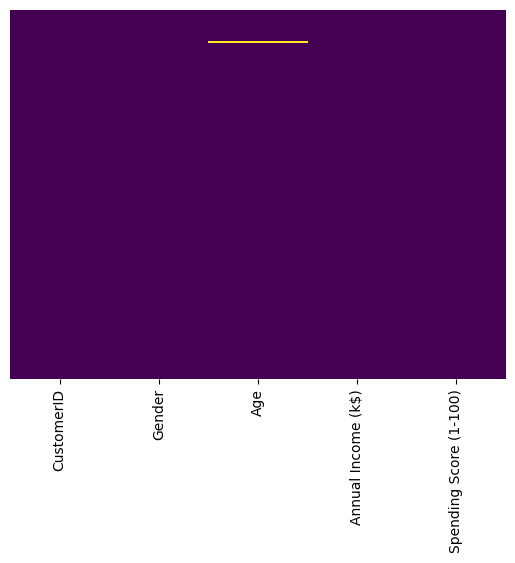

In [ ]:
sns.heatmap(mc.isnull(),yticklabels=False,cbar=False,cmap="viridis")

## 3. Data Cleaning
- Drop `CustomerID`
- Drop null values in `Age`
- Encode `Gender` as binary (Male=1, Female=0)


### Drop `CustomerID`

In [ ]:
mc.drop("CustomerID", axis=1, inplace=True)

<Axes: >

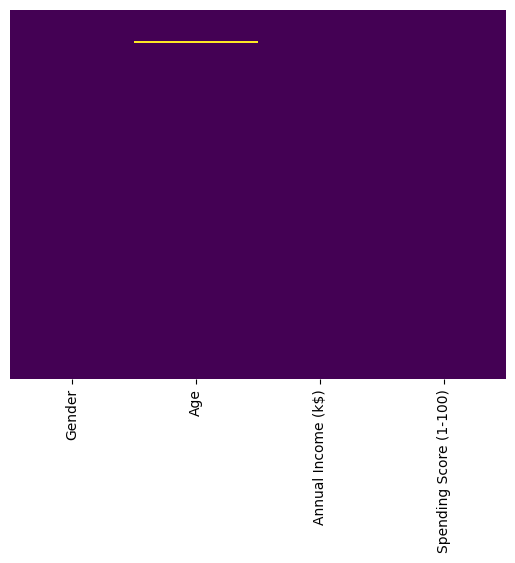

In [ ]:
sns.heatmap(mc.isnull(),yticklabels=False,cbar=False,cmap="viridis")

###Drop null values in `Age`

In [ ]:
mc.dropna(subset=['Age'], inplace=True)

<Axes: >

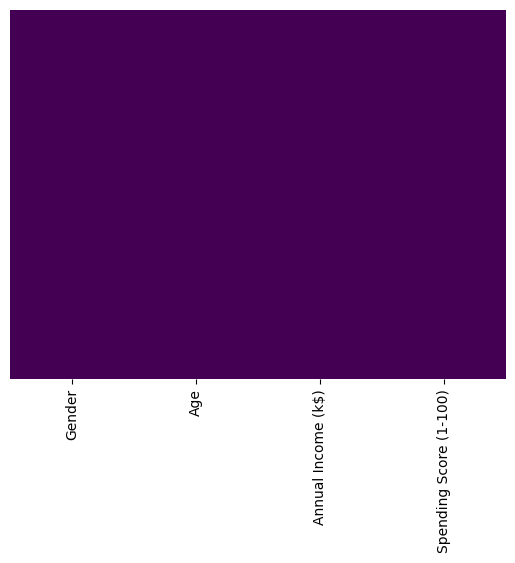

In [ ]:
sns.heatmap(mc.isnull(),yticklabels=False,cbar=False,cmap="viridis")

### Encode `Gender` as binary (Male=1, Female=0)

In [ ]:
Gender_dummies = pd.get_dummies(mc['Gender'], drop_first=True)
mc = pd.concat([mc, Gender_dummies], axis=1)
mc.drop('Gender', axis=1, inplace=True)


In [ ]:
mc.head(3)

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19.0,15,39,True
1,21.0,15,81,True
2,20.0,16,6,False


## 4. Exploratory Data Analysis (EDA)
- Histograms
- Correlation heatmap
- Gender distribution and impact on Spending Score
- Income vs Spending, Age vs Spending


### Histograms


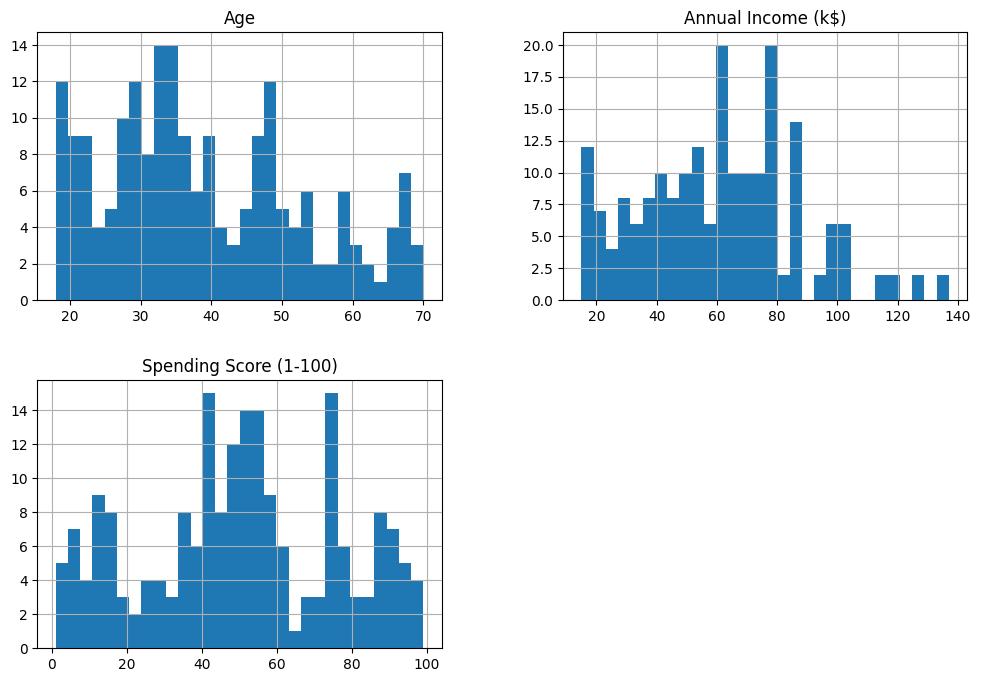

In [ ]:
mc.hist(bins=30, figsize=(12,8))
plt.show()


### Correlation heatmap

<Axes: >

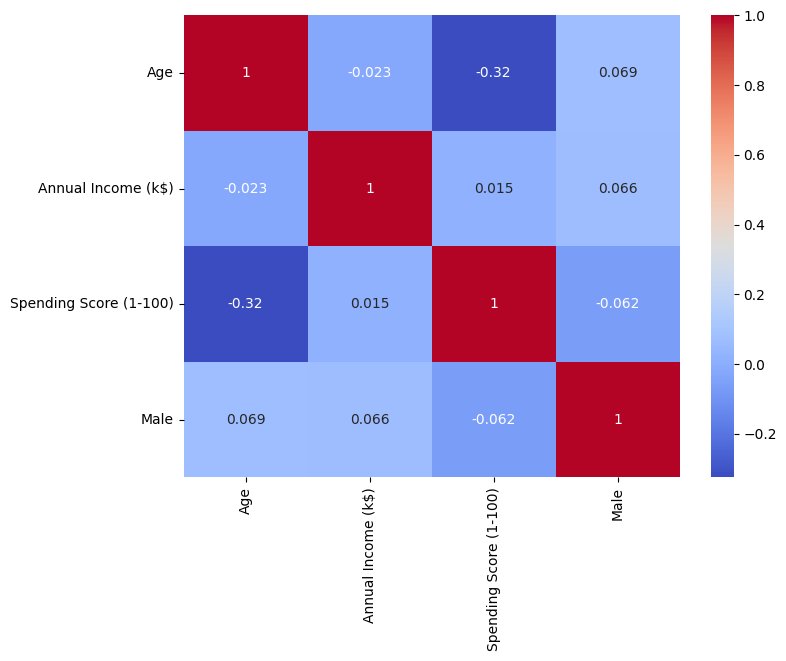

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(mc.corr(), annot=True, cmap="coolwarm")


##### **Results**

1.   Age has strongest relation with spending score
2.   Gender as second



###Gender distribution and impact on Spending Score

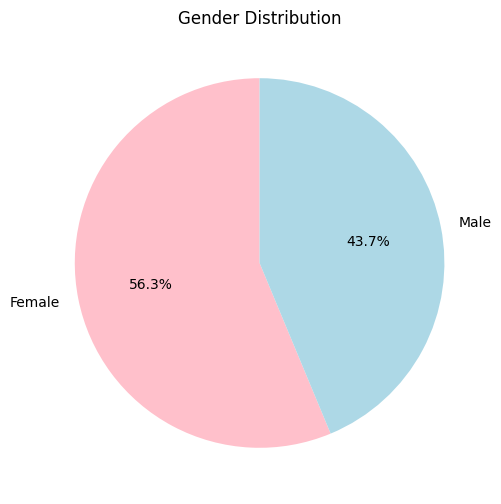

In [ ]:
plt.figure(figsize=(6,6))
mc['Male'].value_counts().plot.pie(labels=['Female','Male'], autopct='%1.1f%%',
                                   colors=['pink','lightblue'], startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

/tmp/ipython-input-2988720531.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Male', y='Spending Score (1-100)', data=mc, palette=['pink','skyblue'], estimator=np.mean, errorbar=None)


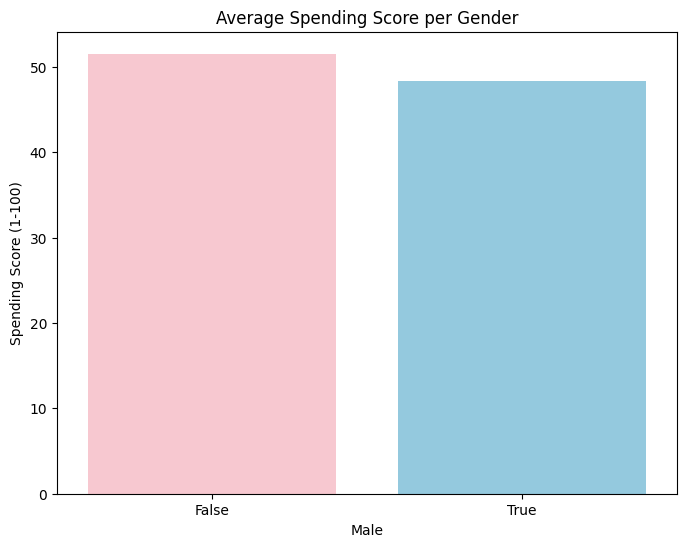

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Male', y='Spending Score (1-100)', data=mc, palette=['pink','skyblue'], estimator=np.mean, errorbar=None)
plt.title("Average Spending Score per Gender")
plt.show()

#### **Results from gender graphs show that gender has almost zero imapct**

###Average Income vs Spending, Age vs Spending

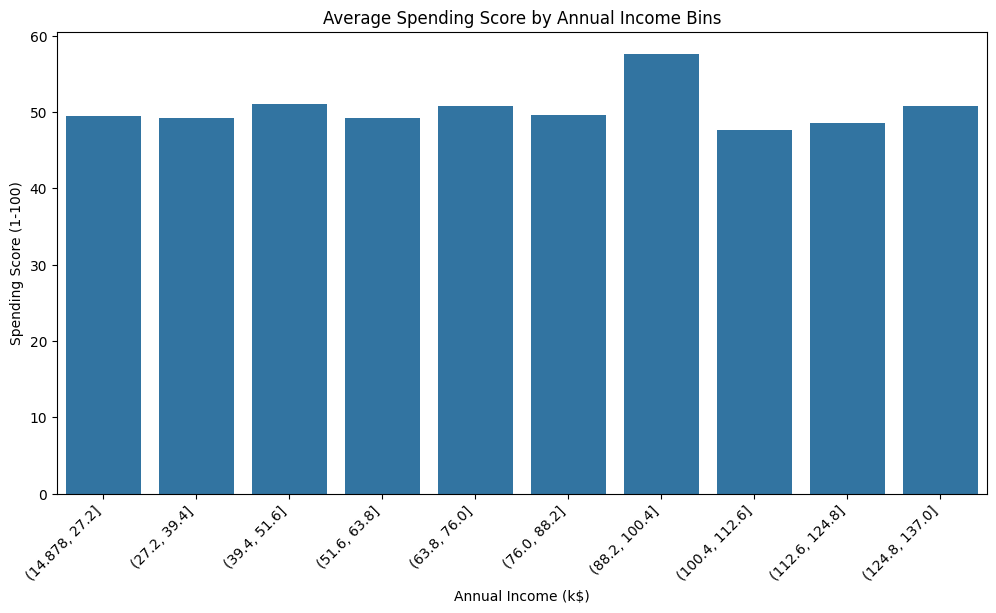

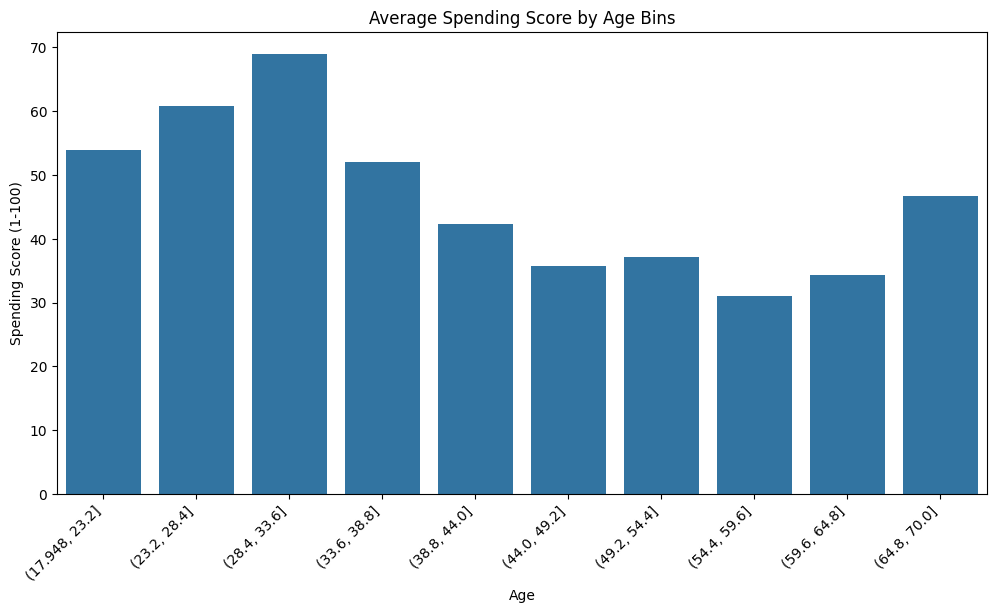

In [ ]:
# Bar chart for Annual Income vs Spending Score
income_bins = pd.cut(mc['Annual Income (k$)'], bins=10)
plt.figure(figsize=(12, 6))
sns.barplot(x=income_bins, y='Spending Score (1-100)', data=mc, errorbar=None)
plt.title('Average Spending Score by Annual Income Bins')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar chart for Age vs Spending Score
age_bins = pd.cut(mc['Age'], bins=10)
plt.figure(figsize=(12, 6))
sns.barplot(x=age_bins, y='Spending Score (1-100)', data=mc, errorbar=None)
plt.title('Average Spending Score by Age Bins')
plt.xticks(rotation=45, ha='right')
plt.show()

### Income vs Spending, Age vs Spending (scatter plot)  

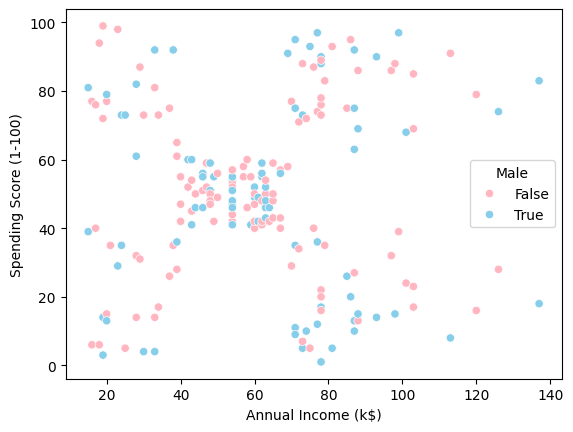

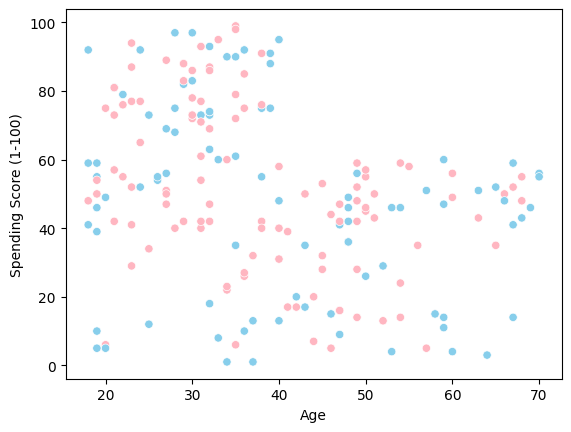

In [ ]:

# رسم حسب الدخل مقابل الإنفاق
sns.scatterplot(
    data=mc,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Male',  # True/False مباشرة
    palette={True:'skyblue', False:'lightpink'},
    legend=True
)
plt.show()

# رسم حسب العمر مقابل الإنفاق
sns.scatterplot(
    data=mc,
    x='Age',
    y='Spending Score (1-100)',
    hue='Male',
    palette={True:'skyblue', False:'lightpink'},
    legend=False
)
plt.show()


## 5. Focused Analysis on Key Segments
From previous visualizations, we identified:
- A dense cluster of **moderate spenders** (Spending Score ~40–60) in the 40k–68k income range.
- **High spenders (80–100)** appear on limited age range but various income levels.

Now, let's dive deeper in these clusters to get insights.


## highliting the cluster in annual income from 40k-68k range    

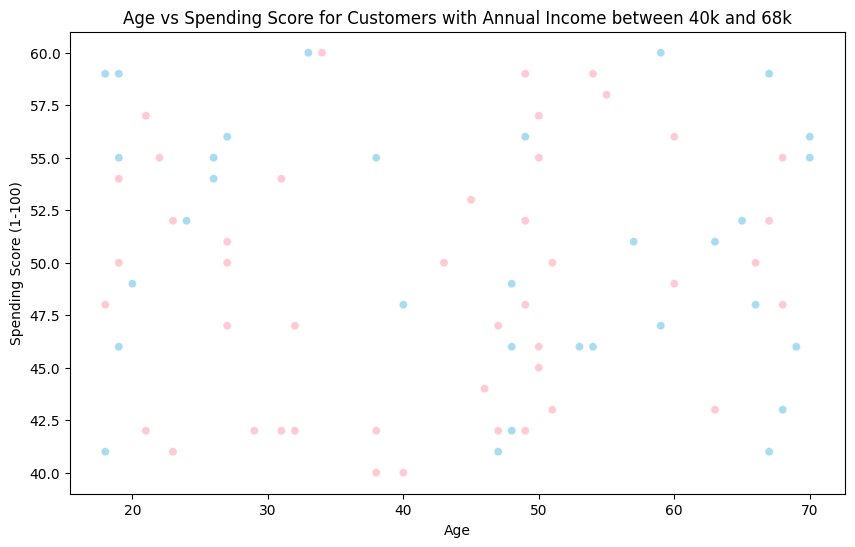

In [ ]:

#Filter the data based on annual income from 40 to 68
filtered_mc = mc[(mc['Annual Income (k$)'] >= 40) & (mc['Annual Income (k$)'] <= 68)]

# Plot Age vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=filtered_mc,
    hue='Male',  # True = Male, False = Female
    palette={True:'skyblue', False:'lightpink'},
    alpha=0.7,   # شفافية للنقاط
            # حجم أكبر للنقاط
    legend=False # إخفاء legend إذا تحب الرسم أنظف
)
plt.title('Age vs Spending Score for Customers with Annual Income between 40k and 68k')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


## highliting most spenders

Percentage of Males: 46.7%
Percentage of Females: 53.3%


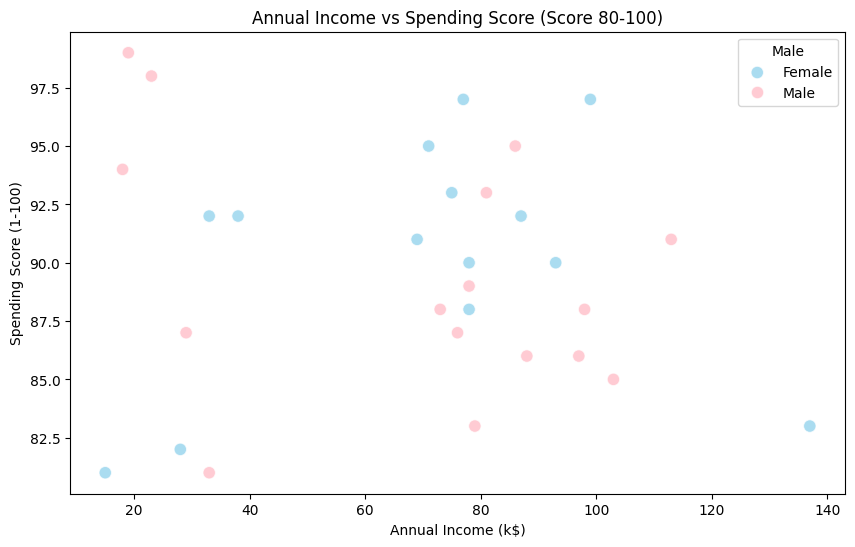

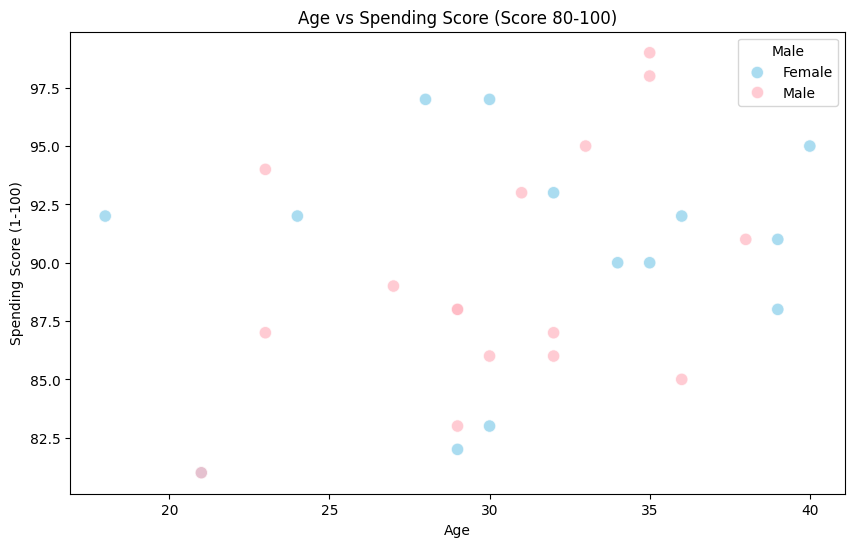

In [ ]:
#  Spending Score
filtered_mc_spending = mc[(mc['Spending Score (1-100)'] >= 80) &
                           (mc['Spending Score (1-100)'] <= 100)]

# male,female percantage
counts = filtered_mc_spending['Male'].value_counts()
total = counts.sum()
male_percent = counts.get(True, 0) / total * 100
female_percent = counts.get(False, 0) / total * 100
print(f"Percentage of Males: {male_percent:.1f}%")
print(f"Percentage of Females: {female_percent:.1f}%")

# Scatter plot: Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=filtered_mc_spending,
    hue='Male',
    palette={True:'skyblue', False:'lightpink'},
    alpha=0.7,
    s=80
)
plt.title('Annual Income vs Spending Score (Score 80-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Male', labels=['Female', 'Male'])
plt.show()

# Scatter plot: Age vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Age',
    y='Spending Score (1-100)',
    data=filtered_mc_spending,
    hue='Male',
    palette={True:'skyblue', False:'lightpink'},
    alpha=0.7,
    s=80
)
plt.title('Age vs Spending Score (Score 80-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Male', labels=['Female', 'Male'])
plt.show()


## summarize last two steps

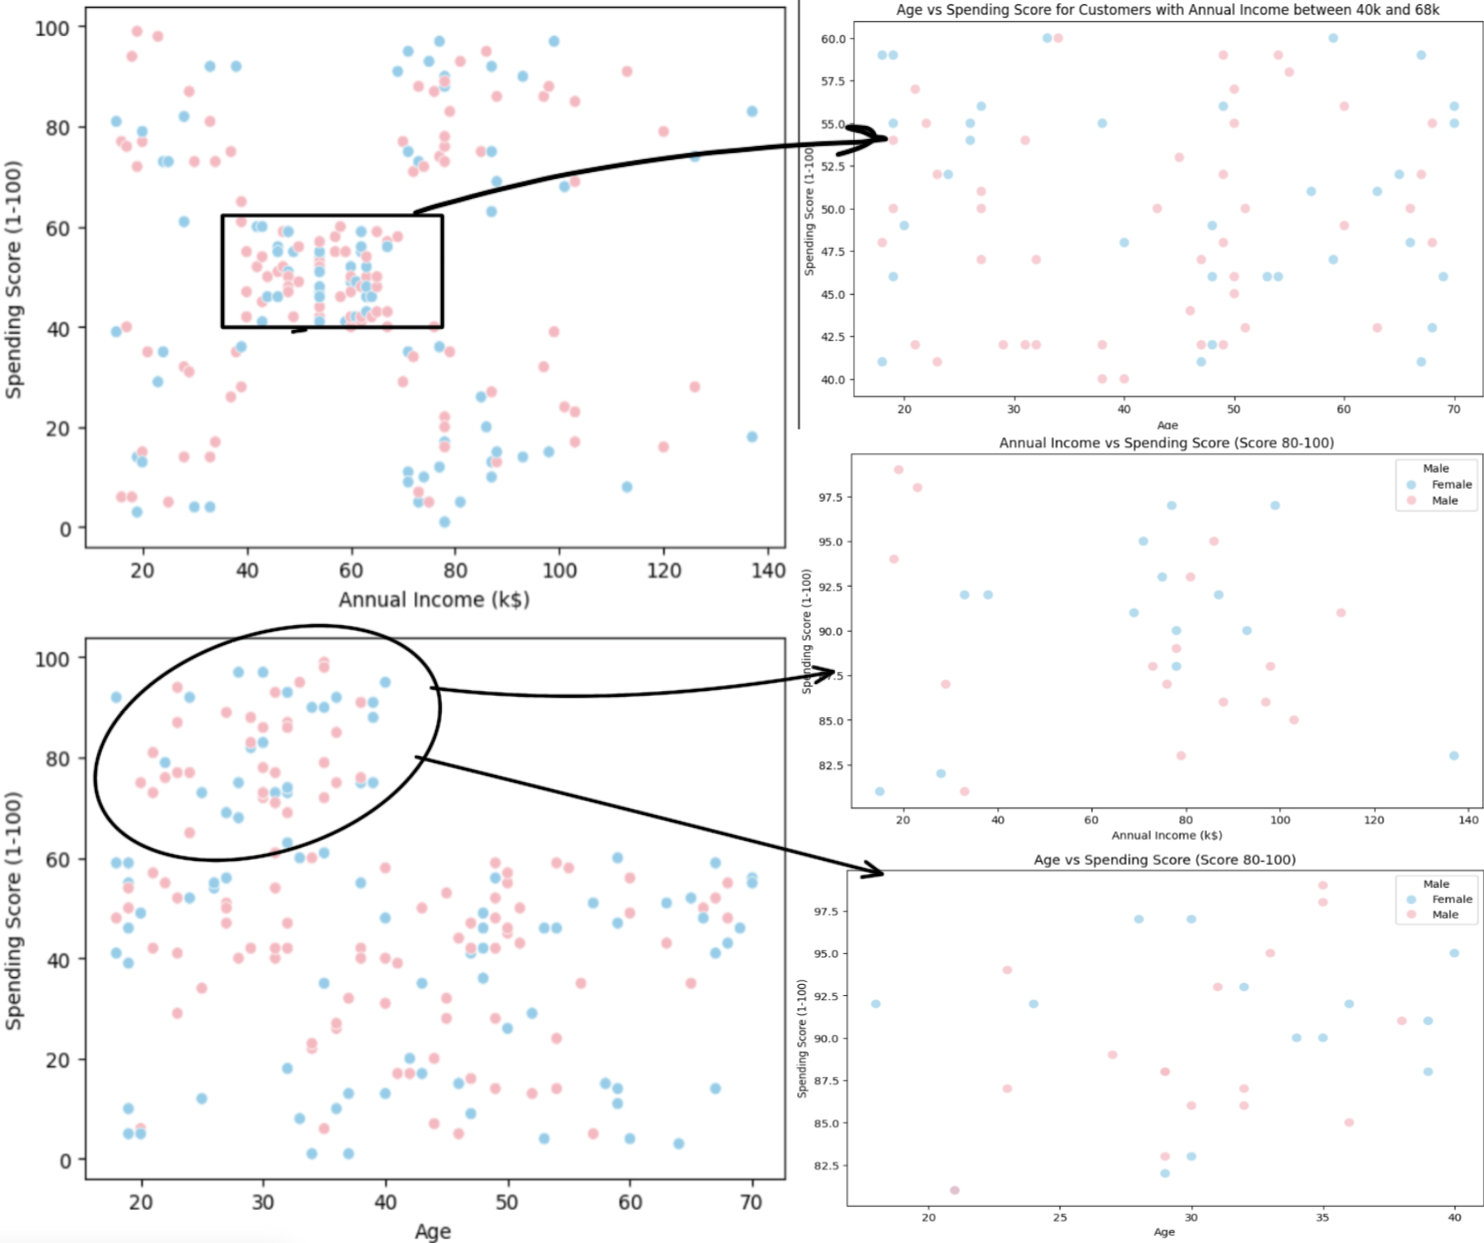

In [ ]:
from IPython.display import Image, display

display(Image(filename='/content/highliting.png'))

# 6. Conclusion  

From our analysis of the Mall Customers dataset, we found:  

- **Gender Impact**: Gender alone has almost no significant effect on spending behavior.  

- **Age & Spending**:  
  - Younger customers (20s–30s) show the **highest spending scores**, peaking around ages 28–34.  
  - Mid-age customers (40s–50s) spend the least, with scores dropping to ~35–40.  
  - Older customers (65+) show a slight increase in spending again.  
  ➝ This indicates **age is a moderate factor** in spending patterns.  

- **Income & Spending**:  
  - Low and high-income customers show **very diverse spending behaviors** (ranging from 10 to 100).  
  - Middle-income customers (40k–68k) are **more stable**, clustering mostly around **40–60 scores**.  
  - This makes the middle-income group **predictable and easier to target**, while low/high-income groups require deeper segmentation.  

- **Focused Segment (40k–68k income)**:  
  - Most customers are **moderate spenders (40–60 score)**.  
  - A smaller share of **high spenders (80–100)** exists across all ages, slightly more among females.  
  - This group represents a strong target for **loyalty programs or promotions**.



## Key Takeaways  
1. Gender alone is not a useful predictor of spending.  
2. **Age matters the most** → young adults are the highest spenders, mid-age spend the least.  
3. Income analysis shows:  
   - Low & high-income = **wide and diverse spending** (10–100).  
   - Middle-income = **clustered around moderate scores (40–60)**.  
4. Middle-income customers form a **stable, predictable segment** worth focused strategies.  
5. High spenders, regardless of age or income, should be prioritized for **marketing strategies**.  

